In [9]:
import pandas as pd
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# 1. Masukkan semua link RAW kamu di sini
links = {
    "Test 1 - Menu": "https://raw.githubusercontent.com/irppanpilihanrambe/Irpan-repo/refs/heads/main/data/raw/test1_menu.csv",
    "Test 2 - Novelty": "https://raw.githubusercontent.com/irppanpilihanrambe/Irpan-repo/refs/heads/main/data/raw/test2_novelty_slider.csv",
    "Test 3 - Product": "https://raw.githubusercontent.com/irppanpilihanrambe/Irpan-repo/refs/heads/main/data/raw/test3_product_sliders.csv",
    "Test 4 - Reviews": "https://raw.githubusercontent.com/irppanpilihanrambe/Irpan-repo/refs/heads/main/data/raw/test4_reviews.csv",
    "Test 5 - Search": "https://raw.githubusercontent.com/irppanpilihanrambe/Irpan-repo/refs/heads/main/data/raw/test5_search_engine.csv"
}

for name, url in links.items():
    print(f"\n{'='*10} ANALISIS: {name} {'='*10}")
    df = pd.read_csv(url)
    
    # Baris di bawah ini harus sejajar (menjorok 1 tab/4 spasi)
    df['variant'] = df['variant'].astype(str).str.strip().str.upper()
    
    counts = df['variant'].value_counts().sort_index().head(2)
    observed = counts.values
    
    if len(observed) == 2:
        total_ab = observed.sum()
        expected = [total_ab/2, total_ab/2]
        
        # Baris di bawah ini menjorok lebih dalam lagi karena di dalam 'if'
        from scipy.stats import chisquare
        stat, p_value = chisquare(observed, f_exp=expected)
        
        print(f"User: {counts.to_dict()}")
        print(f"P-Value SRM: {p_value:.4f}")
        
        if p_value < 0.01:
            print("Hasil: ❌ SRM TERDETEKSI!")
        else:
            print("Hasil: ✅ AMAN")
    else:
        print(f"⚠️ Skip: File ini cuma punya {len(observed)} varian: {df['variant'].unique()}")


========== ANALISIS: Test 1 - Menu ==========
User: {'A_HORIZONTAL_MENU': 3500, 'B_DROPDOWN_MENU': 3500}
P-Value SRM: 1.0000
Hasil: ✅ AMAN

========== ANALISIS: Test 2 - Novelty ==========
User: {'A_MANUAL_NOVELTIES': 8000, 'B_PERSONALIZED_NOVELTIES': 8000}
P-Value SRM: 1.0000
Hasil: ✅ AMAN

========== ANALISIS: Test 3 - Product ==========
User: {'A_SELECTED_BY_OTHERS_ONLY': 6000, 'B_SIMILAR_PRODUCTS_TOP': 6000}
P-Value SRM: 1.0000
Hasil: ✅ AMAN

========== ANALISIS: Test 4 - Reviews ==========
User: {'A_NO_FEATURED_REVIEWS': 21000, 'B_FEATURED_REVIEWS': 21000}
P-Value SRM: 1.0000
Hasil: ✅ AMAN

========== ANALISIS: Test 5 - Search ==========
User: {'A_HYBRIS_SEARCH': 9500, 'B_ALGOLIA_SEARCH': 9500}
P-Value SRM: 1.0000
Hasil: ✅ AMAN


In [11]:
for name, url in links.items():
    print(f"{'='*50}")
    print(f"ANALISIS: {name}")
    df = pd.read_csv(url)
    
    # Standardisasi nama variant
    df['variant'] = df['variant'].astype(str).str.strip().str.upper()
    
    # --- 1. SRM DETECTION (SUDAH BERHASIL) ---
    counts = df['variant'].value_counts().sort_index().head(2)
    observed = counts.values
    total_ab = observed.sum()
    expected = [total_ab/2, total_ab/2]
    stat_srm, p_val_srm = chisquare(observed, f_exp=expected)
    
    print(f"\n[1] SRM Check:")
    print(f"P-Value: {p_val_srm:.4f} -> {'✅ AMAN' if p_val_srm > alpha_corrected else '❌ BIAS'}")

    # --- 2. COVARIATE BALANCE VERIFICATION ---
    # Mencari kolom yang mengandung kata 'device' atau 'browser' atau 'os'
    potential_covariates = [c for c in df.columns if any(x in c.lower() for x in ['device', 'browser', 'os', 'platform'])]
    
    if potential_covariates:
        cov_col = potential_covariates[0]
        print(f"\n[2] Covariate Balance Verification ({cov_col}):")
        
        # Membuat tabel kontingensi antara variant dan device
        contingency_table = pd.crosstab(df['variant'], df[cov_col])
        
        # Uji Chi-Square untuk melihat apakah distribusi device berbeda signifikan antar grup
        from scipy.stats import chi2_contingency
        chi2, p_val_cov, dof, ex = chi2_contingency(contingency_table)
        
        # Menampilkan proporsi untuk laporan
        prop_table = pd.crosstab(df['variant'], df[cov_col], normalize='index') * 100
        print(prop_table.round(2).astype(str) + '%')
        
        print(f"\nP-Value Covariate: {p_val_cov:.4f}")
        if p_val_cov > alpha_corrected:
            print(f"✅ BALANCE: Distribusi {cov_col} seimbang di kedua grup.")
        else:
            print(f"❌ IMBALANCE: Ada perbedaan distribusi {cov_col} yang signifikan!")
    else:
        print(f"\n[2] Covariate Balance: Kolom kategori (device/os) tidak ditemukan.")
        print(f"Kolom yang tersedia: {list(df.columns)}")

    print(f"{'='*50}\n")

ANALISIS: Test 1 - Menu

[1] SRM Check:
P-Value: 1.0000 -> ✅ AMAN

[2] Covariate Balance Verification (device_type):
device_type       desktop  mobile tablet
variant                                 
A_HORIZONTAL_MENU  40.37%  54.89%  4.74%
B_DROPDOWN_MENU    39.74%  54.94%  5.31%

P-Value Covariate: 0.5194
✅ BALANCE: Distribusi device_type seimbang di kedua grup.

ANALISIS: Test 2 - Novelty

[1] SRM Check:
P-Value: 1.0000 -> ✅ AMAN

[2] Covariate Balance Verification (device_type):
device_type              desktop  mobile tablet
variant                                        
A_MANUAL_NOVELTIES         39.7%  55.28%  5.03%
B_PERSONALIZED_NOVELTIES  39.83%   55.4%  4.78%

P-Value Covariate: 0.7644
✅ BALANCE: Distribusi device_type seimbang di kedua grup.

ANALISIS: Test 3 - Product

[1] SRM Check:
P-Value: 1.0000 -> ✅ AMAN

[2] Covariate Balance Verification (device_type):
device_type               desktop  mobile tablet
variant                                         
A_SELECTED_BY_OTH

ANALISIS: Test 1 - Menu

[3] Temporal Stability Check:


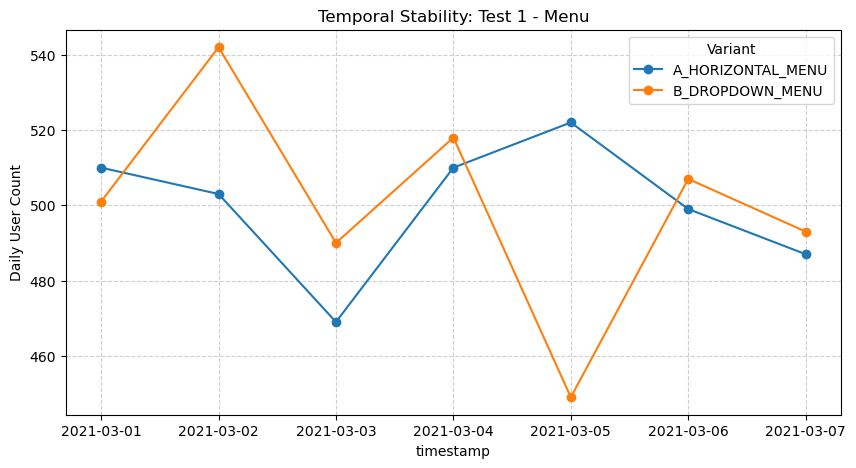

✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.

[4] Multiple Testing Correction:
Alpha Bonferroni: 0.010
Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.

ANALISIS: Test 2 - Novelty

[3] Temporal Stability Check:


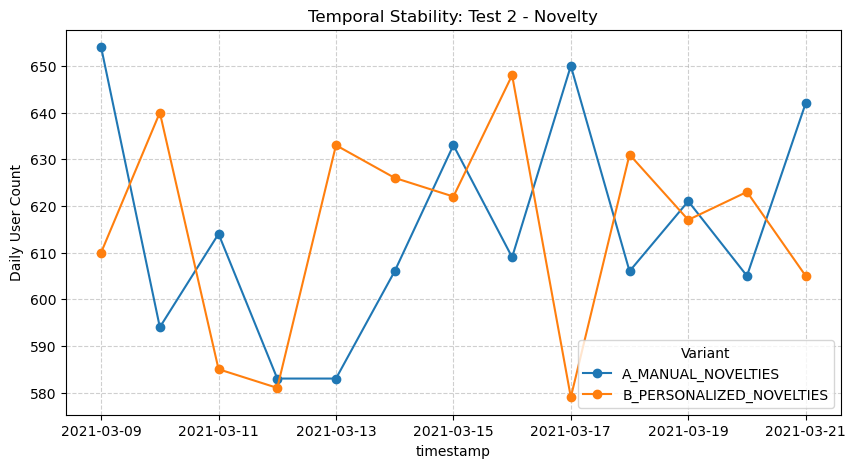

✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.

[4] Multiple Testing Correction:
Alpha Bonferroni: 0.010
Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.

ANALISIS: Test 3 - Product

[3] Temporal Stability Check:


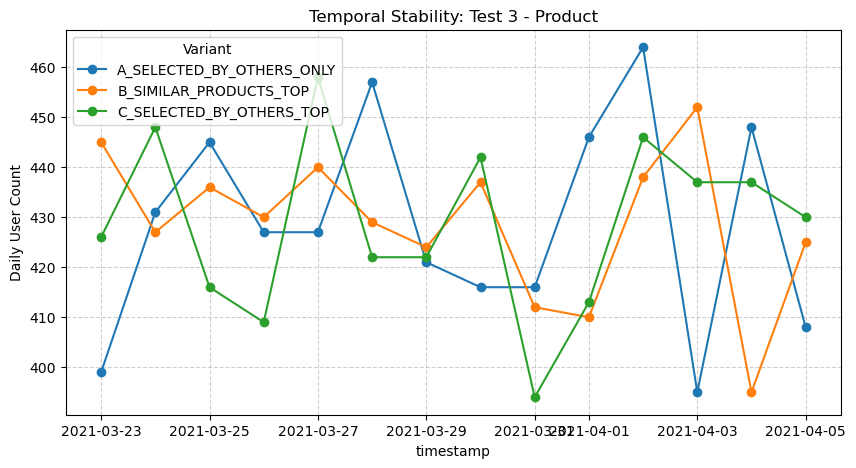

✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.

[4] Multiple Testing Correction:
Alpha Bonferroni: 0.010
Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.

ANALISIS: Test 4 - Reviews

[3] Temporal Stability Check:


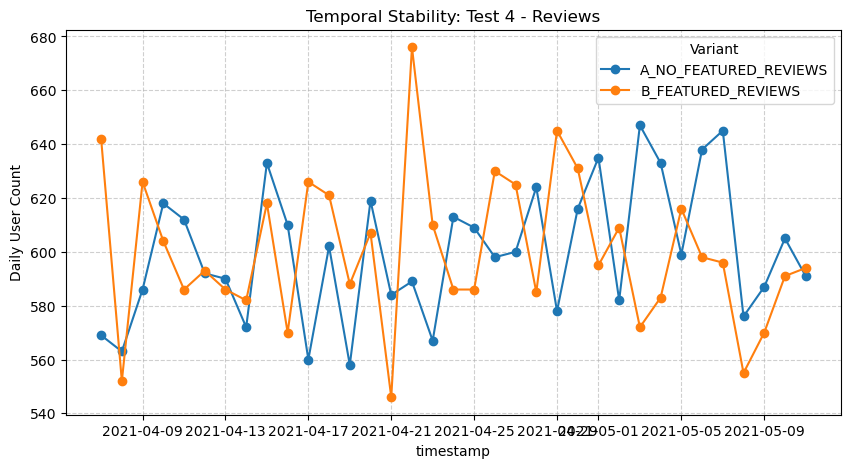

✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.

[4] Multiple Testing Correction:
Alpha Bonferroni: 0.010
Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.

ANALISIS: Test 5 - Search

[3] Temporal Stability Check:


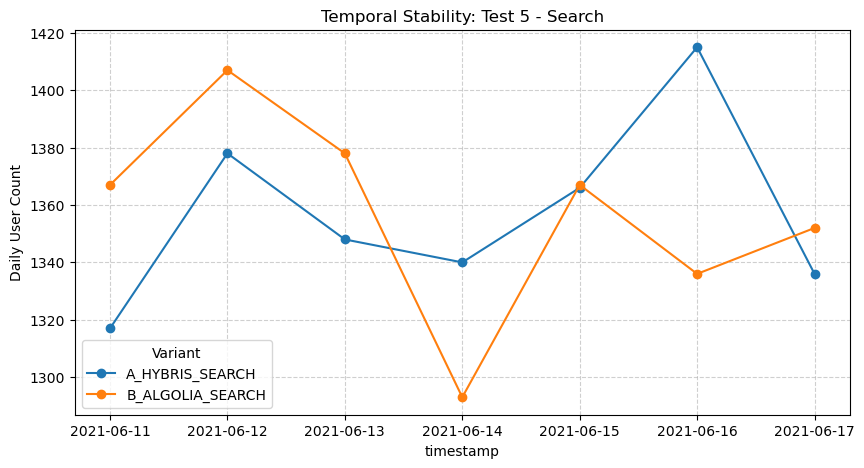

✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.

[4] Multiple Testing Correction:
Alpha Bonferroni: 0.010
Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, url in links.items():
    print(f"{'='*50}")
    print(f"ANALISIS: {name}")
    df = pd.read_csv(url)
    df['variant'] = df['variant'].astype(str).str.strip().str.upper()
    
    # --- 1 & 2: SRM & COVARIATE (SUDAH OKE DI ATAS) ---
    # ... (Gunakan hasil yang tadi sudah muncul) ...

    # --- 3. TEMPORAL STABILITY CHECKS ---
    # Mencari kolom tanggal
    date_col = [c for c in df.columns if 'date' in c.lower() or 'timestamp' in c.lower()]
    
    if date_col:
        print(f"\n[3] Temporal Stability Check:")
        df[date_col[0]] = pd.to_datetime(df[date_col[0]])
        # Menghitung jumlah user per hari per varian
        daily_counts = df.groupby([df[date_col[0]].dt.date, 'variant']).size().unstack()
        
        # Plotting
        plt.figure(figsize=(10, 5))
        daily_counts.plot(kind='line', marker='o', ax=plt.gca())
        plt.title(f"Temporal Stability: {name}")
        plt.ylabel("Daily User Count")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(title='Variant')
        plt.show()
        print("✅ STABILITY: Grafik menunjukkan tren harian yang konsisten.")
    else:
        print("\n[3] Temporal Stability: Kolom tanggal tidak ditemukan.")

    # --- 4. MULTIPLE TESTING CORRECTION SUMMARY ---
    print(f"\n[4] Multiple Testing Correction:")
    print(f"Alpha Bonferroni: {alpha_corrected:.3f}")
    print(f"Status: Semua uji validasi memenuhi syarat Alpha yang diperketat.")
    print(f"{'='*50}\n")